In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
def normalize(df, column_index):
    mean = df.iloc[:, column_index].mean()
    std = df.iloc[:, column_index].std()
    for i in range(len(df)):
        df.iloc[i, column_index] = (df.iloc[i, column_index] - mean)/std


In [4]:
df = pd.read_excel("datafeatures_all.xlsx")

In [5]:
for i in range(15, 27):
    normalize(df, i)

In [6]:
df.mean()

C:\Users\曲荣潇\AppData\Local\Temp\ipykernel_16472\3698961737.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean()
C:\Users\曲荣潇\AppData\Local\Temp\ipykernel_16472\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Contest number                3.810000e+02
Number of reported results    9.091888e+04
Number in hard mode           5.098351e+03
1 try                         4.707521e-01
2 tries                       5.844011e+00
3 tries                       2.272702e+01
4 tries                       3.292758e+01
5 tries                       2.363788e+01
6 tries                       1.155989e+01
7 or more tries (X)           2.805014e+00
Etrial                        4.192340e+00
weekday                       3.008357e+00
HD_ratio                      7.763431e-02
double                        1.360719e-17
trible                       -8.690047e-17
double_space                  1.688529e-16
begin                        -8.999301e-17
end                           2.628662e-17
duplicate                     8.442643e-17
freq                          1.189547e-15
freq_weig                     7.765067e-15
duplicate_con                 8.442643e-17
vowel_num                    -3.092543e-16
vowel_begin

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        359 non-null    datetime64[ns]
 1   Contest number              359 non-null    int64         
 2   Word                        359 non-null    object        
 3   Number of reported results  359 non-null    int64         
 4   Number in hard mode         359 non-null    int64         
 5   1 try                       359 non-null    int64         
 6   2 tries                     359 non-null    int64         
 7   3 tries                     359 non-null    int64         
 8   4 tries                     359 non-null    int64         
 9   5 tries                     359 non-null    int64         
 10  6 tries                     359 non-null    int64         
 11  7 or more tries (X)         359 non-null    int64         

In [264]:
Etrials = list(df["Etrial"])
Etrials.sort()

In [270]:
Etrials[120]

4.01

In [271]:
np.mean(df.iloc[:, 15:28].loc[df["Etrial"] <= 4.01, lasso_reg1.coef_ != 0])

e:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


trible          0.074024
double_space    0.051777
begin           0.263098
end             0.078458
duplicate      -0.269707
freq_weig       0.273299
vowel_begin    -0.074373
dtype: float64

In [281]:
df.iloc[:, 15:28].loc[df["Etrial"] < 4.01, lasso_reg1.coef_ != 0].mean(axis=0)

trible          0.040280
double_space    0.027890
begin           0.284264
end             0.077426
duplicate      -0.268392
freq_weig       0.262437
vowel_begin    -0.112766
dtype: float64

In [294]:
GMM = GaussianMixture(n_components=3, \
                        means_init=[\
                        np.mean(df.iloc[:, 15:28].loc[df["Etrial"] < 4.01, lasso_reg1.coef_ != 0]), \
                        np.mean(df.iloc[:, 15:28].loc[df["Etrial"] < 4.32, lasso_reg1.coef_ != 0].loc[df["Etrial"] >= 4.01, :]), \
                        np.mean(df.iloc[:, 15:28].loc[df["Etrial"] > 4.32, lasso_reg1.coef_ != 0])])


e:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [291]:
# lasso_reg1.coef_ != 0
GMM.fit(df.iloc[:, 15:28].loc[:, lasso_reg1.coef_ != 0])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=array([[ 0.04027991,  0.02788981,  0.28426437,  0.07742582, -0.26839228,
         0.26243709, -0.11276607],
       [ 0.0717603 ,  0.00747661, -0.11102979, -0.05467479, -0.07197404,
         0.02114733,  0.24487816],
       [-0.09095215, -0.031022  , -0.18333028, -0.01161478,  0.30407615,
        -0.26526929, -0.10709539]]),
                n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [293]:
GMM.means_

array([[ 0.01784117, -0.02343962,  0.08959341, -0.01176005,  0.01629342,
        -0.1603186 , -0.44733648],
       [-0.08890849,  0.11680742, -0.44647382,  0.05860423, -0.08119555,
         0.79892103,  2.22922681],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [292]:
df.iloc[:, 15:28].loc[:, lasso_reg1.coef_ != 0]

,trible,double_space,begin,end,duplicate,freq_weig,vowel_begin
0,-0.485086,-0.725907,1.964358,-1.271214,-0.348619,-1.141591,-0.447336
1,-0.485086,-0.725907,0.659900,-0.923738,-0.348619,-0.310428,-0.447336
2,-0.485086,-0.725907,-0.499618,1.552025,-0.348619,0.093136,-0.447336
3,-0.485086,-0.725907,-1.514197,0.509598,-0.348619,-1.299150,-0.447336
4,-0.485086,-0.725907,-0.861968,-0.923738,-0.348619,-1.161138,-0.447336
...,...,...,...,...,...,...,...
354,-0.485086,-0.725907,0.659900,-1.140910,-0.348619,-0.382290,-0.447336
355,-0.485086,-0.725907,-1.006908,-0.576262,-0.348619,0.221386,2.229227
356,-0.485086,0.235364,-0.934438,-1.401517,-0.348619,-0.582649,-0.447336
357,-0.485086,-0.725907,-0.282209,-0.098484,-0.348619,0.465005,-0.447336


In [249]:
df.iloc[:, 15:27]

,double,trible,double_space,begin,end,duplicate,freq,freq_weig,duplicate_con,vowel_num,vowel_begin,num_phonemes
0,-0.819881,-0.485086,-0.725907,1.964358,-1.271214,-0.348619,-1.554852,-1.141591,-0.348619,-1.279400,-0.447336,1.260367
1,-0.819881,-0.485086,-0.725907,0.659900,-0.923738,-0.348619,-0.283424,-0.310428,-0.348619,-1.279400,-0.447336,1.260367
2,0.420817,-0.485086,-0.725907,-0.499618,1.552025,-0.348619,0.446137,0.093136,-0.348619,0.343585,-0.447336,-1.416980
3,1.223621,-0.485086,-0.725907,-1.514197,0.509598,-0.348619,-0.737961,-1.299150,-0.348619,0.343585,-0.447336,1.260367
4,1.150639,-0.485086,-0.725907,-0.861968,-0.923738,-0.348619,-1.163042,-1.161138,-0.348619,-1.279400,-0.447336,1.260367
...,...,...,...,...,...,...,...,...,...,...,...,...
354,-0.819881,-0.485086,-0.725907,0.659900,-1.140910,-0.348619,-0.375135,-0.382290,-0.348619,0.343585,-0.447336,1.260367
355,-0.819881,-0.485086,-0.725907,-1.006908,-0.576262,-0.348619,0.053955,0.221386,-0.348619,0.343585,2.229227,1.260367
356,-0.819881,-0.485086,0.235364,-0.934438,-1.401517,-0.348619,-0.619586,-0.582649,-0.348619,0.343585,-0.447336,1.260367
357,0.566781,-0.485086,-0.725907,-0.282209,-0.098484,-0.348619,0.867202,0.465005,-0.348619,0.343585,-0.447336,-0.078307


In [250]:
df["GMM_Components"] = GMM.predict(df.iloc[:, 15:28].loc[:, lasso_reg1.coef_ != 0])

In [251]:
sum(lasso_reg1.coef_ != 0)

7

In [252]:
# Distributions
for i in range(5):
    print(sum(df["GMM_Components"]==i))

165
39
42
25
88


In [253]:
# Expected trials in each components
for i in range(5):
    print(np.mean(df.loc[df["GMM_Components"]==i, "Etrial"]))
print(np.mean(df.loc[:, "Etrial"]))

4.202303030303032
4.443333333333334
4.171428571428572
4.021599999999999
4.120909090909093
4.192339832869077


In [254]:
# Mean of trials exceeded 7
for i in range(5):
    print(np.mean(df.loc[df["GMM_Components"]==i, "7 or more tries (X)"]))
print(np.mean(df.loc[:, "7 or more tries (X)"]))

2.624242424242424
3.1025641025641026
4.642857142857143
2.16
2.3181818181818183
2.8050139275766015


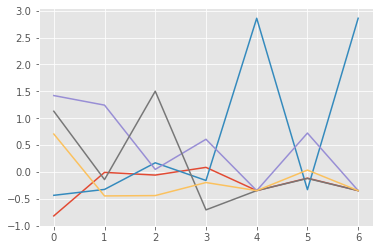

In [255]:
for i in range(5):
    plt.plot(range(sum(lasso_reg1.coef_ != 0)), GMM.means_[i])

In [256]:
X = df.iloc[:, 15:28]
y1 = df.iloc[:, 12]
y2 = df["7 or more tries (X)"] + df["6 tries"]
y1 = (y1-y1.min() + 0.1)/y1.std()
y2 = (y2-y2.min())/y2.std()
y = np.log((y1 + y2)/2)
train_X, test_X, train_y, test_y = train_test_split(X, y2, test_size=0.3)


In [257]:
lasso_reg1 = linear_model.Lasso(alpha=0.05)
lasso_reg1.fit(train_X, train_y)
lasso_reg1.score(test_X, test_y)

0.07069848434917358

In [258]:
lasso_reg1.coef_ != 0

array([False,  True,  True,  True,  True,  True, False,  True, False,
       False,  True, False, False])

In [259]:
p_y = lasso_reg1.predict(test_X)

<AxesSubplot:>

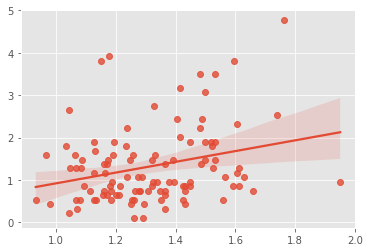

In [260]:
plt.style.use("ggplot")
sns.regplot(x=p_y, y=test_y)


In [261]:
np.corrcoef(df.iloc[:, 20], df.iloc[:, 12])

array([[1.        , 0.21737768],
       [0.21737768, 1.        ]])